# Inference Question About Diabetes

In [81]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

In [82]:
set.seed(999)

In [83]:
diabetes <- read_csv('https://raw.githubusercontent.com/Kayleeli/STAT201-Group-23/main/data/diabetes.csv') 

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, d...
lgl (1): outcome

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [84]:
head(diabetes)

pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
6,148,72,35,0,33.6,0.627,50,TRUE
1,85,66,29,0,26.6,0.351,31,FALSE
8,183,64,0,0,23.3,0.672,32,TRUE
1,89,66,23,94,28.1,0.167,21,FALSE
0,137,40,35,168,43.1,2.288,33,TRUE
5,116,74,0,0,25.6,0.201,30,FALSE


1. split people into 2 groups based on outcome, true means diabetes, false means healthy.
2. we only focus on the relationship between bmi and outcome

In [85]:
diabetes_group <- diabetes %>%
                  filter(outcome=="TRUE") %>%
                  select(bmi)

healthy_group <- diabetes %>%
                 filter(outcome=="FALSE") %>%
                 select(bmi)
head(diabetes_group)
head(healthy_group)

bmi
<dbl>
33.6
23.3
43.1
31.0
30.5
0.0


bmi
<dbl>
26.6
28.1
25.6
35.3
37.6
27.1


  we try to compare the difference of mean bmi value between two groups. we will use bootstrapping methods, getting a accurate estimator of mean bmi value for each group.

(1) we ramdomly create a single single, size=100, from diabetes_group.

In [86]:
sample_diabetes <- diabetes_group %>%
                   rep_sample_n(size=100, reps=1, replace=FALSE) %>%
                   ungroup()

head(sample_diabetes)                   

replicate,bmi
<int>,<dbl>
1,35.4
1,52.3
1,32.8
1,31.6
1,30.0
1,32.9


(2) we create 1000 bootstrap samples based on this single sample and find mean bmi value for each sample

In [87]:
bootstrap_diabetes <- diabetes_group %>%
                      rep_sample_n(size=100, reps=1000, replace=TRUE) %>%
                      group_by(replicate) %>%
                      summarize(mean_bmi = mean(bmi)) %>%
                      select(mean_bmi)
bootstrap_diabetes

mean_bmi
<dbl>
34.318
35.939
34.971
34.867
35.553
34.347
36.194
35.178
33.955


(3) find the 90% confidence interval for diabetes_group

In [88]:
interval_diabetes <- 
    bootstrap_diabetes %>% 
    summarize(ci_lower = quantile(mean_bmi, 0.05),
              ci_upper = quantile(mean_bmi, 0.95))
              

interval_diabetes

ci_lower,ci_upper
<dbl>,<dbl>
33.8957,36.34305


(4) create the histogram plot

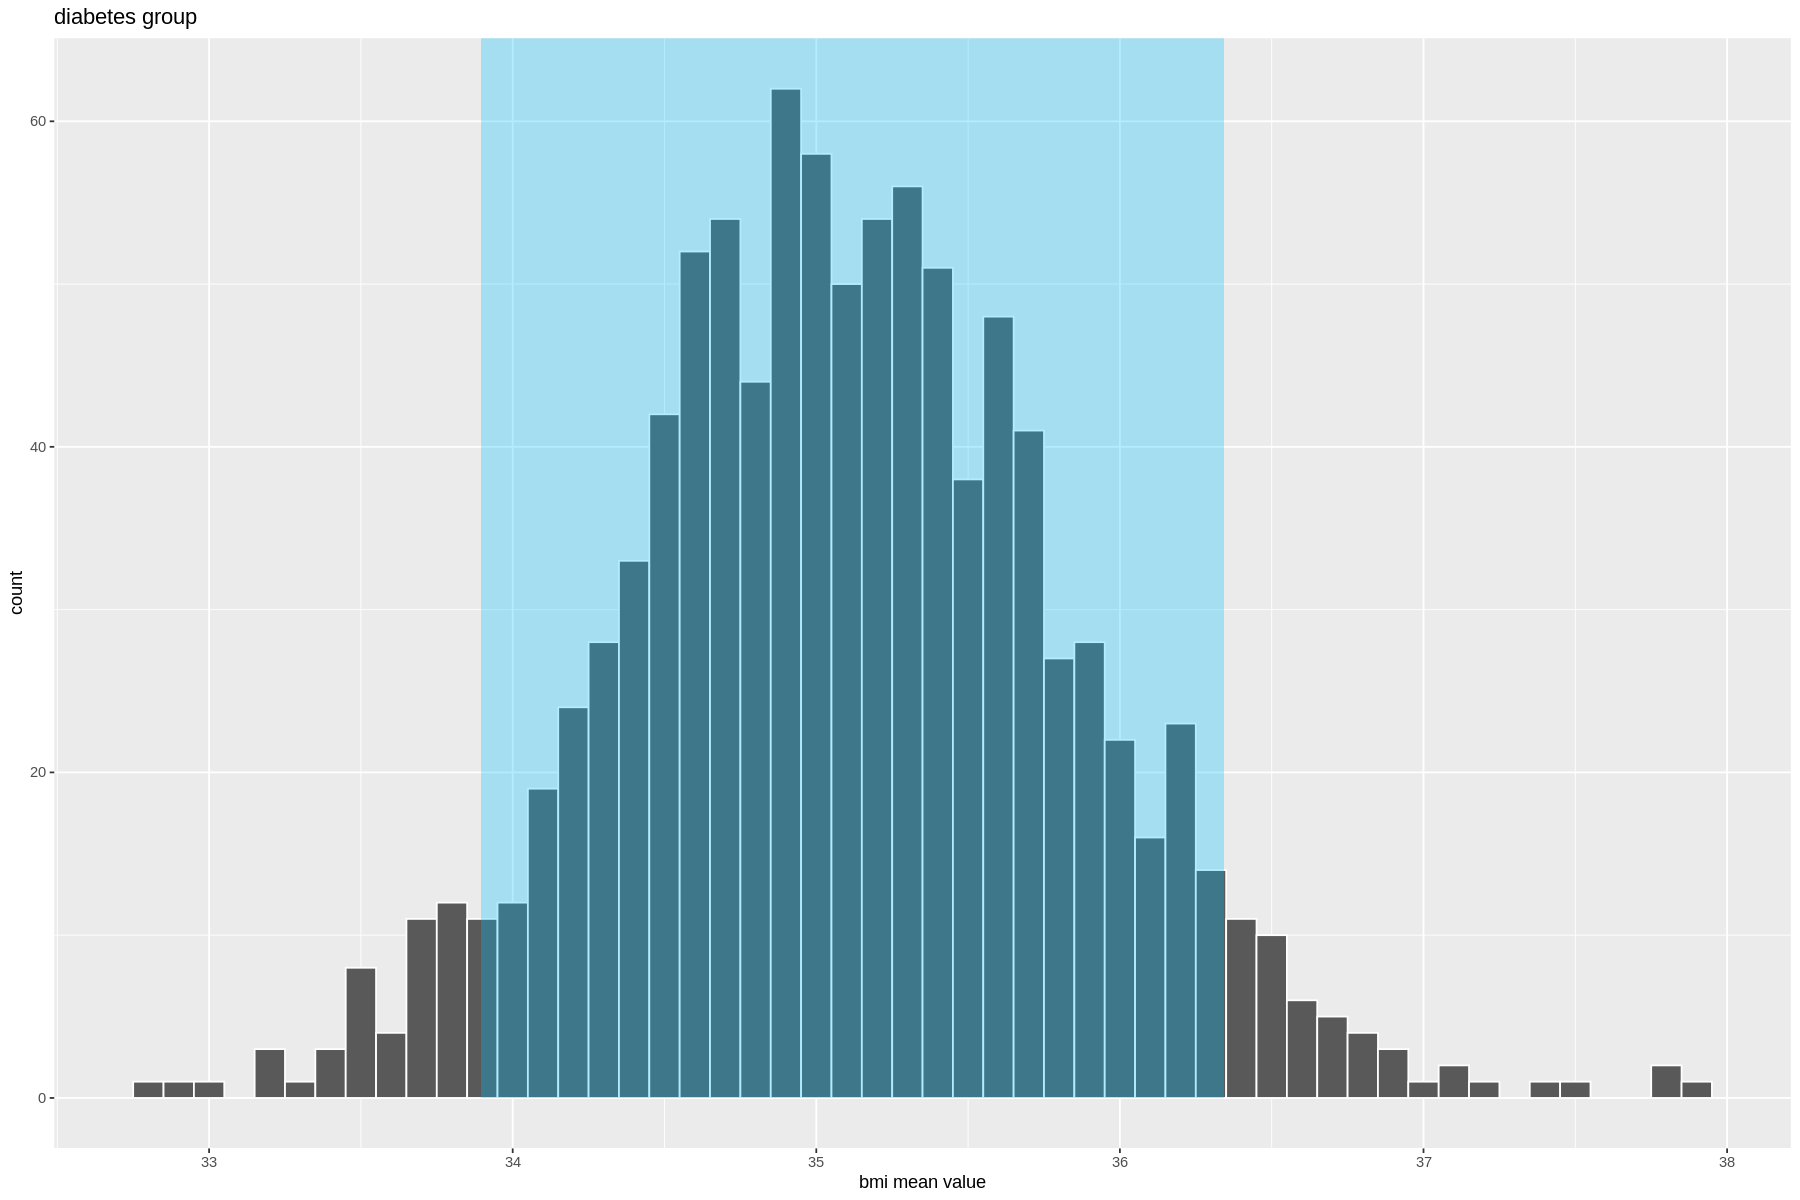

In [89]:
diabetes_hist <- bootstrap_diabetes %>%
                 ggplot(aes(x=mean_bmi))+
                 geom_histogram(binwidth=0.1, color="white")+
                 annotate("rect", xmin = interval_diabetes$ci_lower, xmax = interval_diabetes$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)+
             labs(x="bmi mean value")+
             ggtitle("diabetes group")
diabetes_hist

we repeat all the steps above for healthy group

In [90]:
sample_healthy <- healthy_group %>%
                   rep_sample_n(size=100, reps=1, replace=FALSE) %>%
                   ungroup()

head(sample_healthy)                   

replicate,bmi
<int>,<dbl>
1,34.1
1,29.8
1,29.0
1,29.5
1,33.8
1,25.4


In [91]:
bootstrap_healthy <- healthy_group %>%
                      rep_sample_n(size=100, reps=1000, replace=TRUE) %>%
                      group_by(replicate) %>%
                      summarize(mean_bmi = mean(bmi)) %>%
                      select(mean_bmi)
bootstrap_healthy

mean_bmi
<dbl>
29.961
30.772
30.682
30.506
29.673
29.766
33.184
29.931
31.038


In [92]:
interval_healthy <- 
    bootstrap_healthy %>% 
    summarize(ci_lower = quantile(mean_bmi, 0.05),
              ci_upper = quantile(mean_bmi, 0.95))
              

interval_healthy

ci_lower,ci_upper
<dbl>,<dbl>
29.18475,31.55415


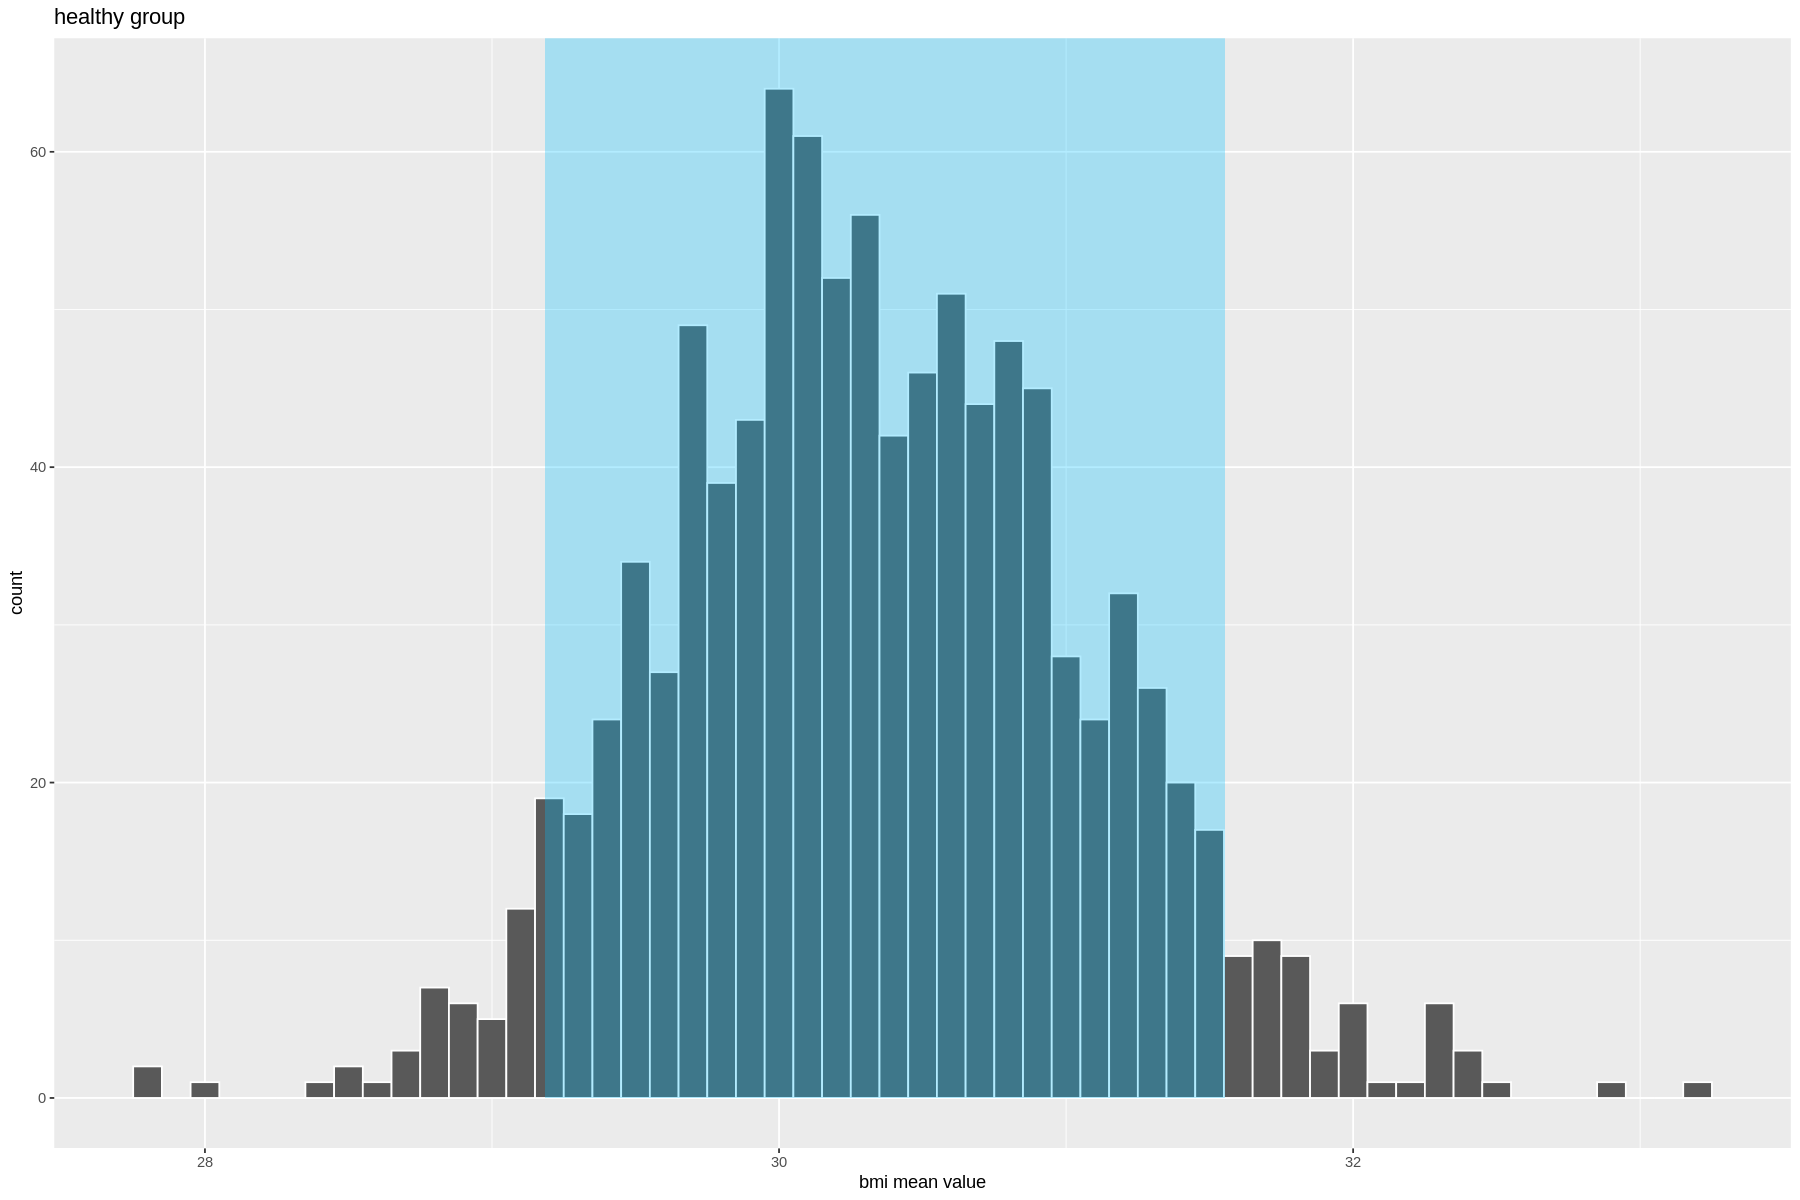

In [93]:
healthy_hist <- bootstrap_healthy %>%
                 ggplot(aes(x=mean_bmi))+
                 geom_histogram(binwidth=0.1, color="white")+
                 annotate("rect", xmin = interval_healthy$ci_lower, xmax = interval_healthy$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)+
             labs(x="bmi mean value")+
             ggtitle("healthy group")
healthy_hist

we can found the bmi value in confidence interval of healthy people is obviously lower than that of people get diabetes.